In [3]:
from tensorflow.keras.models import load_model

In [4]:
model = load_model('cats_and_dogs_small_1.h5')

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 20)      560       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        5792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        3

In [6]:
img_path = '../data/test1/1.jpg'

In [7]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [8]:
img = image.load_img(img_path,target_size=(150,150))

In [9]:
img_tensor = image.img_to_array(img)

In [10]:
img_tensor = np.expand_dims(img_tensor,axis=0)

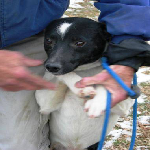

In [11]:
img

In [12]:
img_tensor /= 255

In [13]:
img_tensor.shape

(1, 150, 150, 3)

In [14]:
import matplotlib.pyplot as plt

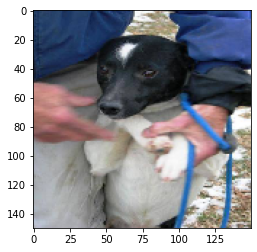

In [15]:
plt.imshow(img_tensor[0])

In [16]:
from tensorflow.keras import models

In [17]:
layer_outputs = [layer.output for layer in model.layers[:8]]

In [18]:
activation_model = models.Model(inputs=model.input,outputs=layer_outputs)

In [19]:
activations = activation_model.predict(img_tensor)

In [22]:
len(activations)

8

In [52]:
first_layer_activation = activations[0]

In [53]:
print(first_layer_activation.shape)

(1, 148, 148, 20)


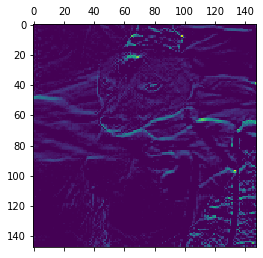

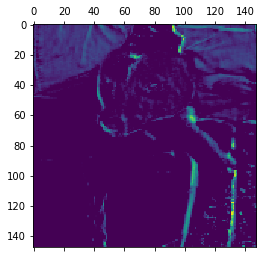

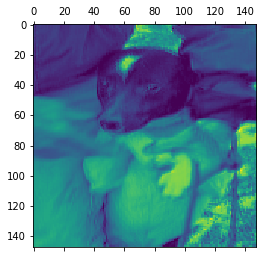

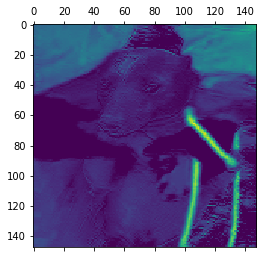

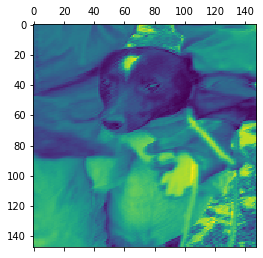

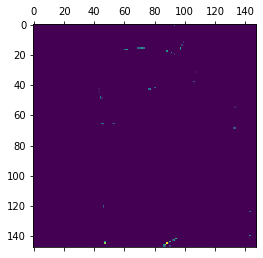

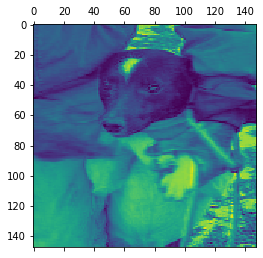

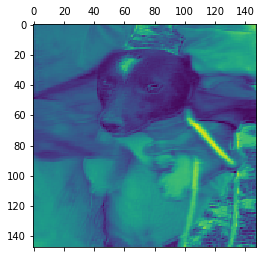

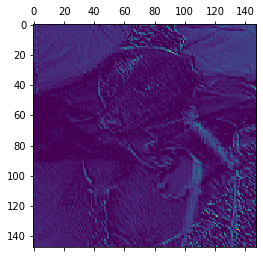

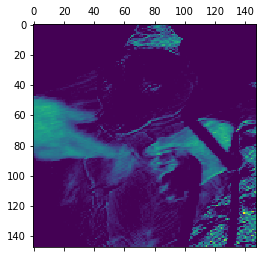

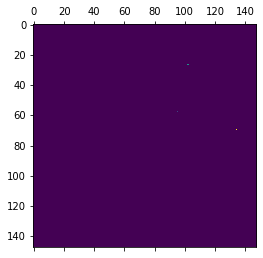

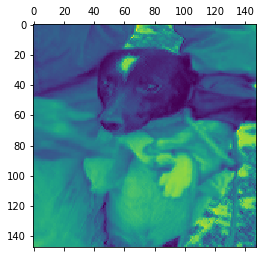

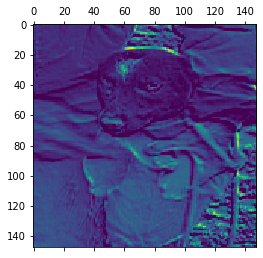

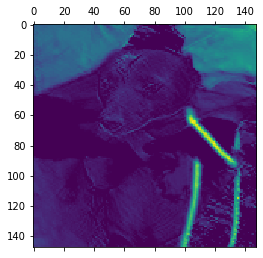

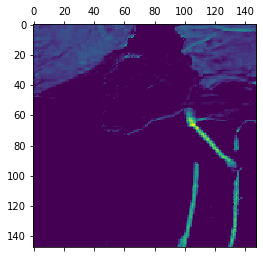

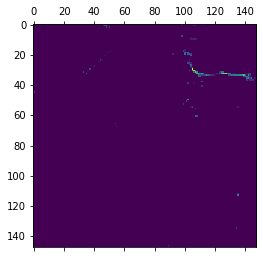

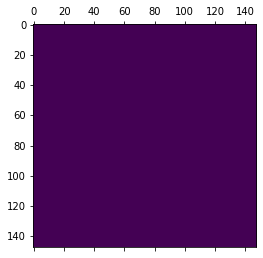

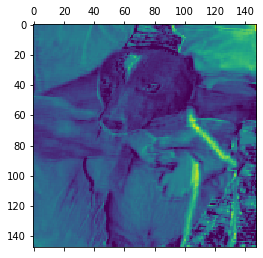

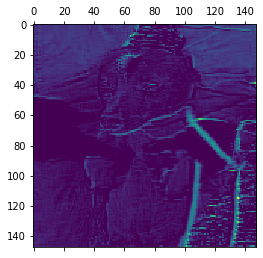

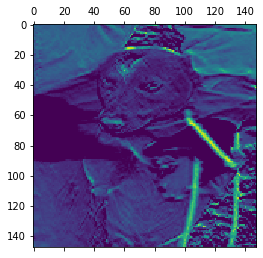

In [54]:
for i in range(0,20):
    plt.matshow(first_layer_activation[0,:,:,i],cmap='viridis')
    #plt.matshow(first_layer_activation[0,:,:,17])